In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [58]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import patches
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
from utils import from_feather

In [4]:
rcParams['figure.figsize'] = (10, 8)
rcParams['font.size'] = 16

In [5]:
x_trn, y_trn, x_tst = from_feather('x_trn', 'y_trn', 'x_tst')

In [6]:
x_trn.sample(5)

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
356383,2784,31,0.91992,0.36319,0.059170,0.135450,0.133100,0.052524,-0.275410,-2.11940,-1.40250,-17.2460
414922,3241,74,0.93181,0.33103,0.055119,0.138240,-0.006169,0.061615,-0.338420,2.31550,0.23716,-13.4290
163020,1273,76,0.20151,0.96760,0.149880,0.026050,-0.128580,-0.046225,-0.032251,2.29140,8.30190,-6.1306
307021,2398,77,0.59416,-0.79034,-0.114540,0.096022,-0.044961,-0.045833,0.024910,-4.39200,5.00870,-5.2084
142734,1115,14,0.59543,-0.78898,-0.113480,0.100480,0.152860,0.095192,-0.303570,0.76587,4.82430,-12.2740


In [7]:
y_trn.sample(5)

,series_id,group_id,surface
2591,2591,41,concrete
3173,3173,41,concrete
2131,2131,65,wood
171,171,1,tiled
155,155,13,fine_concrete


In [8]:
freq = (y_trn.surface
 .value_counts(normalize=True)
 .rename('freq')
 .reset_index()
 .rename(columns={'index': 'surface'}))

In [9]:
freq

,surface,freq
0,concrete,0.204462
1,soft_pvc,0.192126
2,wood,0.159318
3,tiled,0.134908
4,fine_concrete,0.095276
5,hard_tiles_large_space,0.080840
6,soft_tiles,0.077953
7,carpet,0.049606
8,hard_tiles,0.005512


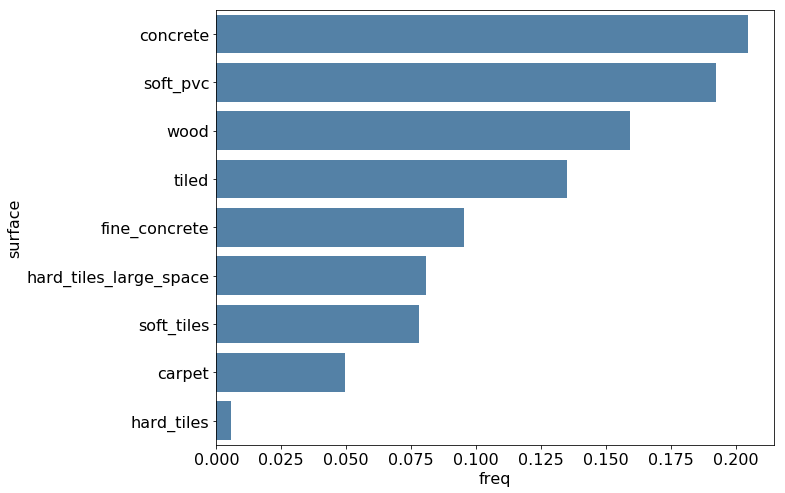

In [10]:
ax = sns.barplot(x='freq', y='surface', color='steelblue', data=freq)

In [11]:
cnt = (y_trn
       .groupby('group_id')
       .surface
       .value_counts()
       .rename('count')
       .reset_index()
       .sort_values(by='surface'))

In [12]:
group, surface, count = cnt['group_id'], cnt['surface'], cnt['count']

In [13]:
xs = list(range(len(cnt)))

In [14]:
uniq_surf = set(surface)
pal = sns.color_palette(n_colors=len(uniq_surf))
colors_map = dict(zip(uniq_surf, pal))
colors = [colors_map[surf] for surf in surface]

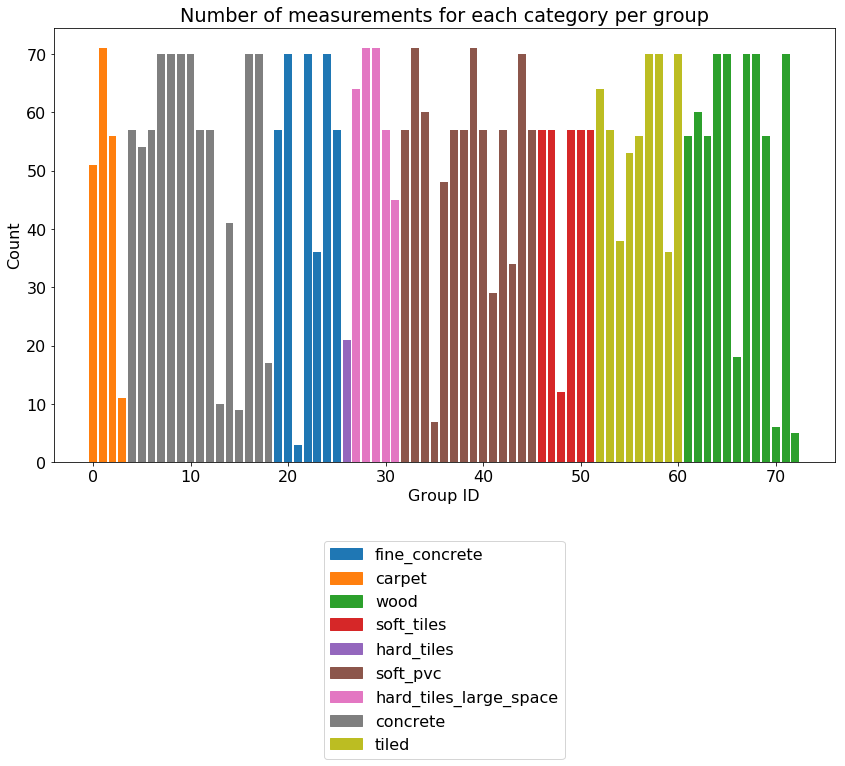

In [28]:
f, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.bar(x=xs, height=count, color=colors)
ax.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.7),
    handles=[patches.Patch(color=c, label=s) for s, c in colors_map.items()])
ax.set_xlabel('Group ID')
ax.set_ylabel('Count')
_ = ax.set_title('Number of measurements for each category per group')

In [50]:
surf_groups = (pd.merge(
    x_trn, y_trn,
    how='left',
    left_on='series_id', right_on='series_id',
    suffixes=['', '.y']
).groupby('surface'))

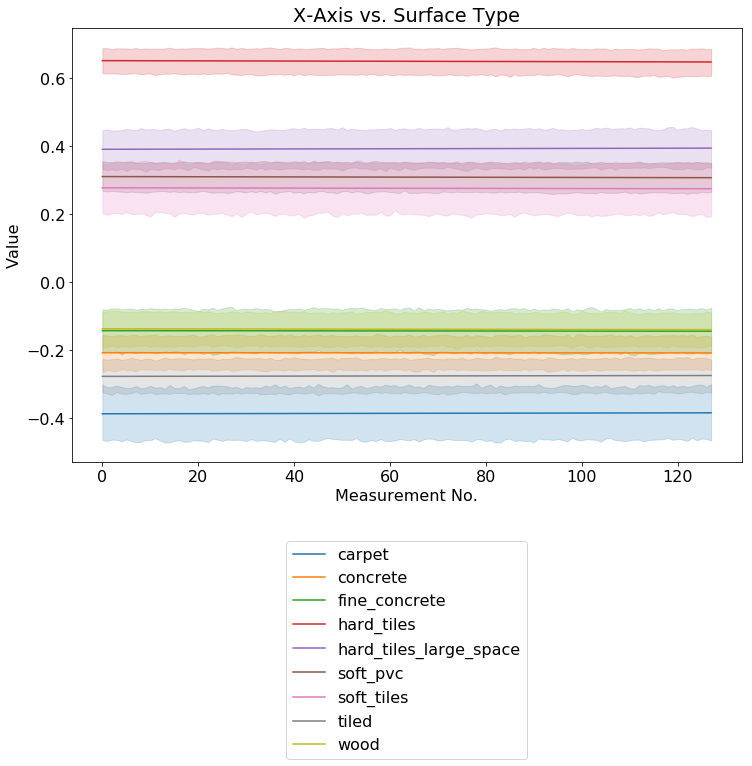

In [61]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
for surf, group in surf_groups:
    sns.lineplot(x='measurement_number', y='orientation_X', data=group, ax=ax, label=surf)
ax.set_title('X-Axis vs. Surface Type')
ax.set_xlabel('Measurement No.')
ax.set_ylabel('Value')
_ = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7))